<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.000245,204.924939,204.923372,0.001566
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,0.010107,242.349835,242.341900,0.007935
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,0.013975,233.195661,233.184430,0.011231
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-0.000839,212.348622,212.348451,0.000171
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-0.014289,123.917318,123.926610,-0.009292
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-0.001485,258.739089,258.739862,-0.000773
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.001898,174.309737,174.306520,0.003217
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-0.009442,246.664016,246.672696,-0.008680
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-0.007793,171.687944,171.695479,-0.007535


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.000245  204.924939   
      1.0    71.746582  23.412244  56.159668  81.021234  0.010107  242.349835   
      2.0    72.835067  42.026817  33.351798  74.968003  0.013975  233.195661   
      3.0    41.477889  94.558543  24.690261  41.622768 -0.000839  212.348622   
      4.0    25.688058  24.733032  28.293732  35.216784 -0.014289  123.917318   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -0.001485  258.739089   
      16.0   60.165518  29.912703  48.730358  25.499260  0.001898  174.309737   
      17.0   91.537818  31.480605  72.025308  41.629727 -0.009442  246.664016   
      18.0   49.543834  31.063851  36.273478  44.814574 -0.007793  171.687944   
      19.0   89.242547  67.732547  80.156220  26.759038 -0.002463  273.887890   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.923372  0.001566  
      1.0    242.341900  0.007935  
      2.0    233.184430  0.011231  
      3.0    212.348451  0.000171  
      4.0    123.926610 -0.009292  
...                 ...       ...  
999.0 15.0   258.739862 -0.000773  
      16.0   174.306520  0.003217  
      17.0   246.672696 -0.008680  
      18.0   171.695479 -0.007535  
      19.0   273.887716  0.000174  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.000245  204.924939   
      1.0    71.746582  23.412244  56.159668  81.021234  0.010107  242.349835   
      2.0    72.835067  42.026817  33.351798  74.968003  0.013975  233.195661   
      3.0    41.477889  94.558543  24.690261  41.622768 -0.000839  212.348622   
      4.0    25.688058  24.733032  28.293732  35.216784 -0.014289  123.917318   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -0.001485  258.739089   
      16.0   60.165518  29.912703  48.730358  25.499260  0.001898  174.309737   
      17.0   91.537818  31.480605  72.025308  41.629727 -0.009442  246.664016   
      18.0   49.543834  31.063851  36.273478  44.814574 -0.007793  171.687944   
      19.0   89.242547  67.732547  80.156220  26.759038 -0.002463  273.887890   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.923372  0.001566  
      1.0    242.341900  0.007935  
      2.0    233.184430  0.011231  
      3.0    212.348451  0.000171  
      4.0    123.926610 -0.009292  
...                 ...       ...  
999.0 15.0   258.739862 -0.000773  
      16.0   174.306520  0.003217  
      17.0   246.672696 -0.008680  
      18.0   171.695479 -0.007535  
      19.0   273.887716  0.000174  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.000245,204.924939,204.923372,0.001566
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,0.010107,242.349835,242.341900,0.007935
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,0.013975,233.195661,233.184430,0.011231
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-0.000839,212.348622,212.348451,0.000171
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-0.014289,123.917318,123.926610,-0.009292
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-0.001485,258.739089,258.739862,-0.000773
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.001898,174.309737,174.306520,0.003217
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-0.009442,246.664016,246.672696,-0.008680
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-0.007793,171.687944,171.695479,-0.007535


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.000245  204.924939   
      1.0    71.746582  23.412244  56.159668  81.021234  0.010107  242.349835   
      2.0    72.835067  42.026817  33.351798  74.968003  0.013975  233.195661   
      3.0    41.477889  94.558543  24.690261  41.622768 -0.000839  212.348622   
      4.0    25.688058  24.733032  28.293732  35.216784 -0.014289  123.917318   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -0.001485  258.739089   
      16.0   60.165518  29.912703  48.730358  25.499260  0.001898  174.309737   
      17.0   91.537818  31.480605  72.025308  41.629727 -0.009442  246.664016   
      18.0   49.543834  31.063851  36.273478  44.814574 -0.007793  171.687944   
      19.0   89.242547  67.732547  80.156220  26.759038 -0.002463  273.887890   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.923372  0.001566  
      1.0    242.341900  0.007935  
      2.0    233.184430  0.011231  
      3.0    212.348451  0.000171  
      4.0    123.926610 -0.009292  
...                 ...       ...  
999.0 15.0   258.739862 -0.000773  
      16.0   174.306520  0.003217  
      17.0   246.672696 -0.008680  
      18.0   171.695479 -0.007535  
      19.0   273.887716  0.000174  

[20000 rows x 8 columns]

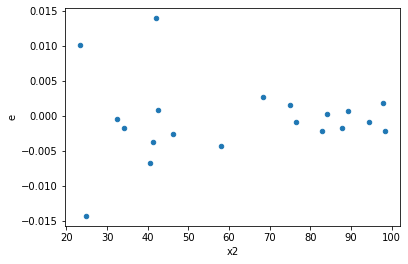

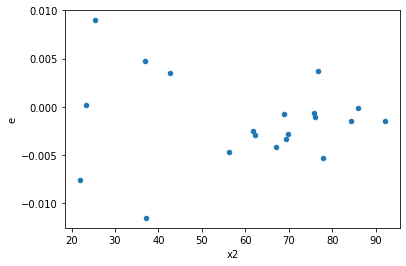

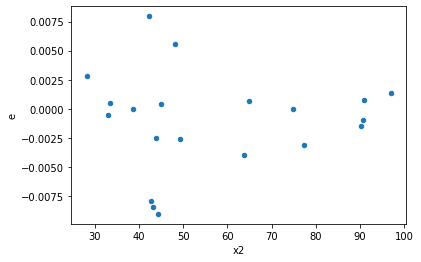

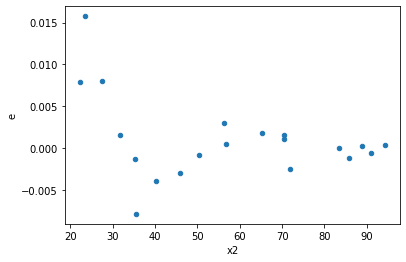

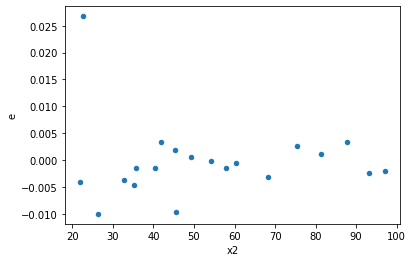

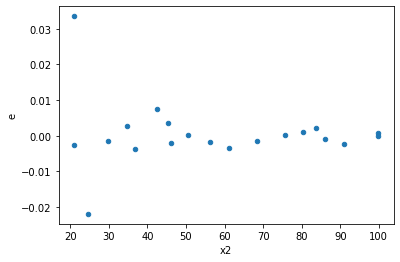

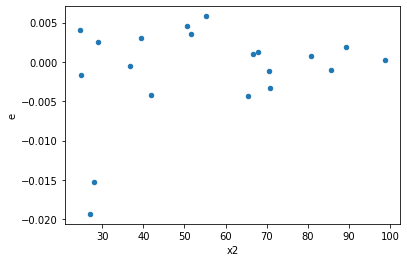

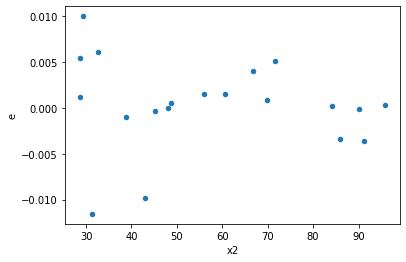

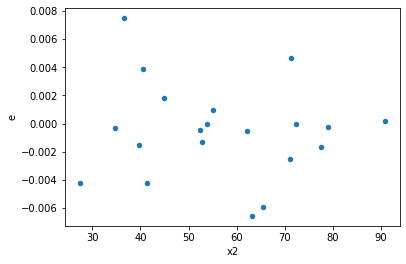

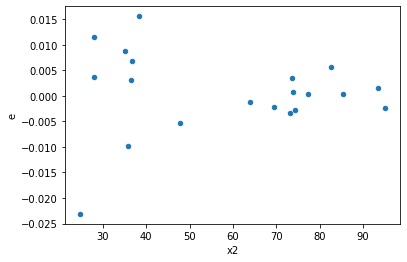

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,10.0,2.0,0.00017608999316809045,5.457052584880921e-05,1.7608999316809046e-05,2.7285262924404607e-05,1.5495067285486732,0.9100182099442458,0.5449908950278771,0.4550091049721229,Reject001=1 : Homoscedasticity
4.0,10.0,2.0,2.569612669721679e-05,7.792822261967628e-05,2.569612669721679e-06,3.896411130983814e-05,15.16341811704191,0.12683386636267224,0.9365830668186639,0.06341693318133612,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,9.568203443038371e-06,0.000407957424934366,2.392050860759593e-06,5.099467811679575e-05,21.318392076580867,0.0005040279850356821,0.9997479860074822,0.00025201399251784107,Reject001=0 : Heteroscedasticity
7.0,2.0,10.0,1.2904839385223436e-05,0.0001602681951175743,6.452419692611718e-06,1.602681951175743e-05,2.483846413479394,0.2662291996578774,0.8668854001710613,0.1331145998289387,Reject001=1 : Homoscedasticity
10.0,7.0,5.0,1.566032926059795e-05,4.057905204866241e-05,2.2371898943711354e-06,8.115810409732481e-06,3.627680614038265,0.17502107273517997,0.91248946363241,0.08751053636758999,Reject001=1 : Homoscedasticity
13.0,3.0,9.0,4.557968499637505e-06,0.00011238490744125269,1.5193228332125019e-06,1.2487211937916965e-05,8.218932582954492,0.012086942563882097,0.993956528718059,0.0060434712819410485,Reject001=1 : Homoscedasticity
14.0,10.0,2.0,4.986324730523161e-05,4.2186043930812986e-05,4.986324730523161e-06,2.1093021965406493e-05,4.230174147361122,0.4124871939542678,0.7937564030228661,0.2062435969771339,Reject001=1 : Homoscedasticity
20.0,9.0,3.0,0.00011814607018232132,6.50397540440873e-05,1.3127341131369034e-05,2.1679918014695766e-05,1.651508694543599,0.7443509841847304,0.6278245079076348,0.3721754920923652,Reject001=1 : Homoscedasticity
22.0,3.0,9.0,2.8886422106053015e-08,0.00010443133143093274,9.628807368684338e-09,1.1603481270103638e-05,1205.0798012474015,9.794609567848056e-12,0.9999999999951027,4.897304783924028e-12,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,7.0,0.00028244886487529793,4.1582447549039627e-05,5.6489772975059584e-05,5.9403496498628035e-06,0.10515796642492238,0.024679039355359218,Reject001=1 : Homoscedasticity
1.0,10.0,2.0,0.00017608999316809045,5.457052584880921e-05,1.7608999316809046e-05,2.7285262924404607e-05,1.5495067285486732,0.9100182099442458,Reject001=1 : Homoscedasticity
2.0,5.0,7.0,0.00018491439298437854,4.9305672252818296e-05,3.6982878596875706e-05,7.043667464688328e-06,0.19045752337091937,0.08635761863608529,Reject001=1 : Homoscedasticity
3.0,13.0,1.0,0.00013172526676859286,7.270142102516845e-27,1.0132712828353297e-05,7.270142102516845e-27,7.174921687480944e-22,2.7612015401465257e-131,Reject001=0 : Heteroscedasticity
4.0,10.0,2.0,2.569612669721679e-05,7.792822261967628e-05,2.569612669721679e-06,3.896411130983814e-05,15.16341811704191,0.12683386636267224,Reject001=1 : Homoscedasticity
5.0,8.0,4.0,0.001129568183708312,4.876579256715231e-06,0.000141196022963539,1.2191448141788079e-06,0.008634413268804512,8.191623723111552e-07,Reject001=0 : Heteroscedasticity
6.0,4.0,8.0,9.568203443038371e-06,0.000407957424934366,2.392050860759593e-06,5.099467811679575e-05,21.318392076580867,0.0005040279850356821,Reject001=0 : Heteroscedasticity
7.0,2.0,10.0,1.2904839385223436e-05,0.0001602681951175743,6.452419692611718e-06,1.602681951175743e-05,2.483846413479394,0.2662291996578774,Reject001=1 : Homoscedasticity
8.0,8.0,4.0,9.801144065780868e-05,2.6624561172514573e-05,1.2251430082226086e-05,6.656140293128643e-06,0.5432949662574593,0.4290236252144567,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      680
Reject001=0 : Heteroscedasticity    320
Name: Result_test, dtype: int64